# Support vector machine hyperparameters

This notebook showcases different hyperparameters in support vector machines. The complete explanation is available at https://youranalystbuddy.com/support-vector-machine-hyperparameters/

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.read_csv('test_exam.csv')
data.head(2)

,Reading,Practicing,Result
0,5.773836,8.061479,1
1,8.658042,7.952046,1


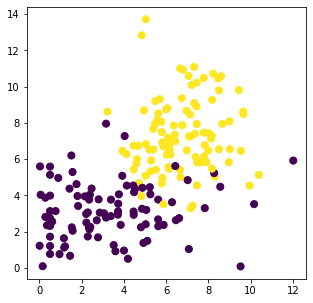

In [2]:
plt.figure(figsize=(5,5))
plt.scatter(data['Reading'],data['Practicing'],c=data['Result'],s=50)
plt.show()

### Extract features (X) and label (y) for convenience later

In [3]:
X = data[['Reading','Practicing']].values
y = data['Result'].values

### Function to draw SVM and boundaries

In [4]:
from sklearn.model_selection import cross_val_score

def draw_svm(X,y,svm,title=None):
    h = 0.02
    #generate point grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    #generate scores for all points
    svm.fit(X,y)
    score = svm.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
    #plot
    plt.contour(x1,x2,score,levels=[-1,0,1],linewidths=3,linestyles=['dashed','solid','dashed'])
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],s=130,c='red')
    plt.scatter(X[:, 0],X[:, 1],c=y,s=50)
    cvaccuracy = round(cross_val_score(svm,X,y).mean(),4)
    plt.title(title+', CV-Accuracy: '+str(cvaccuracy), fontsize=14)

## Soft margin hyperparameter C

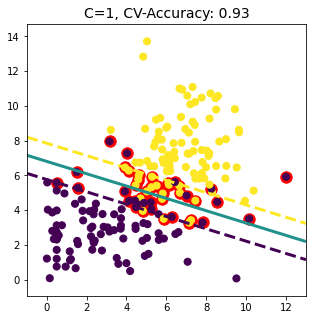

In [5]:
plt.figure(figsize=(5,5))
draw_svm(X,y,SVC(kernel='linear', C=1),'C=1')
plt.show()

Lower C means softer margins, and higher C, harder margins (however only up to some points)

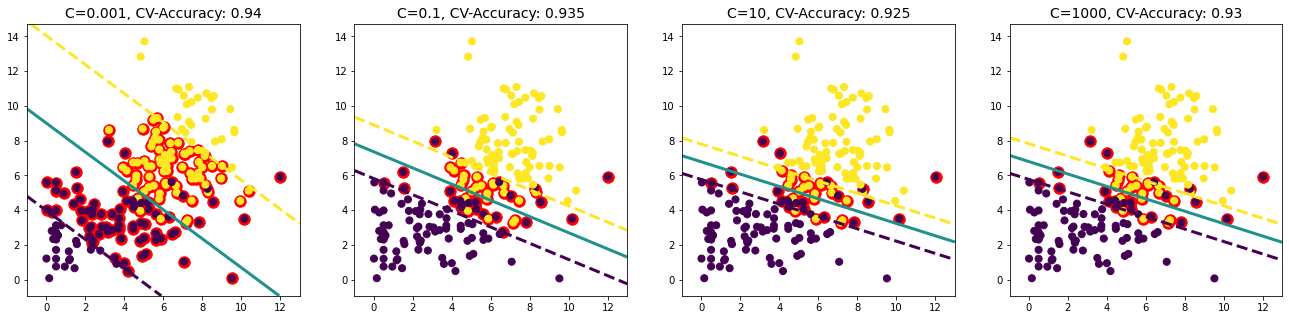

In [6]:
plt.figure(figsize=(22.5,5))
i = 1
for C in [0.001, 0.1, 10, 1000]:
    plt.subplot(1, 4, i)
    draw_svm(X,y,SVC(kernel='linear', C=C),'C='+str(C))
    i += 1
plt.show()

## Kernel function

### Polynomial kernel

$K(x_1, x_2) = (x_1\cdot x_2 + r)^d$
- $d$: `degree`
- $r$: `coef0`

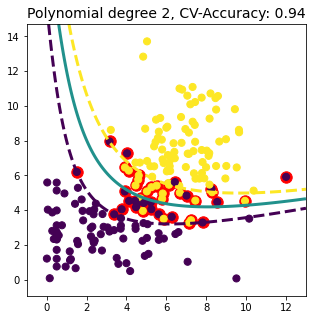

In [7]:
plt.figure(figsize=(5,5))
draw_svm(X,y,SVC(kernel='poly', degree=2),'Polynomial degree 2')
plt.show()

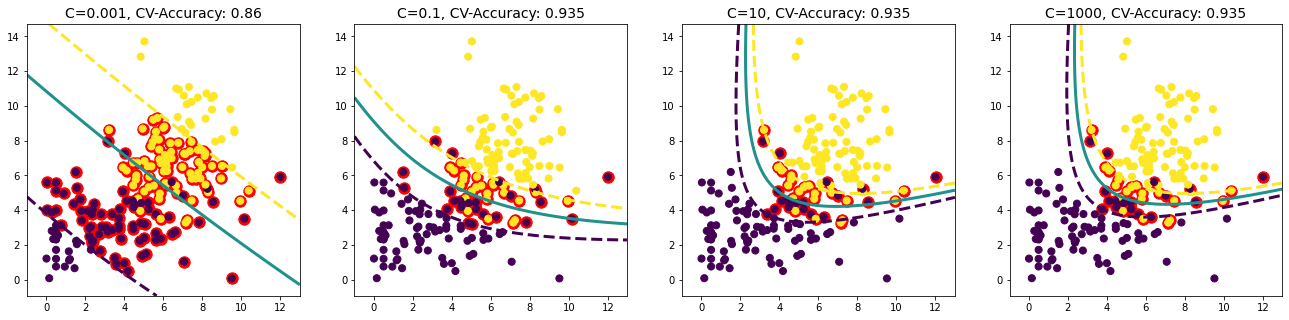

In [8]:
plt.figure(figsize=(22.5,5))
i = 1
for C in [0.001, 0.1, 10, 1000]:
    plt.subplot(1, 4, i)
    draw_svm(X,y,SVC(kernel='poly', degree=2, C=C),'C='+str(C))
    i += 1
plt.show()

#### Varying coef0

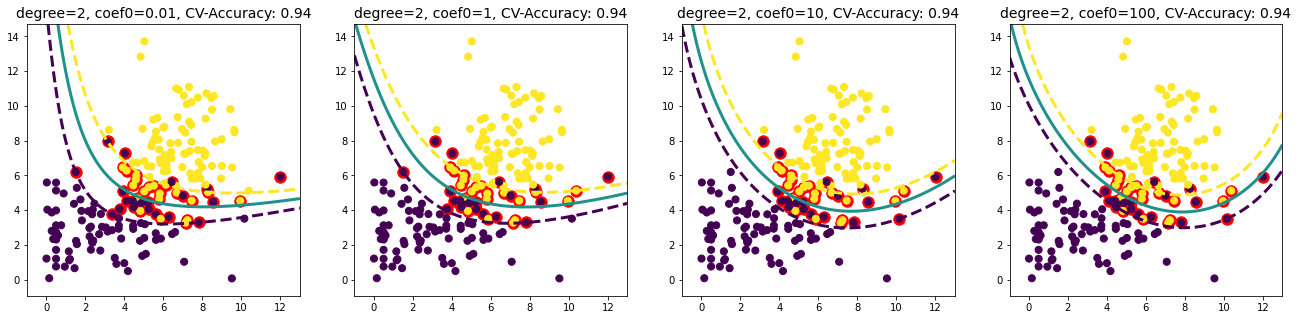

In [9]:
plt.figure(figsize=(22.5,5))
i = 1
for coef0 in [0.01, 1, 10, 100]:
    plt.subplot(1, 4, i)
    draw_svm(X,y,SVC(kernel='poly', degree=2, coef0=coef0),'degree=2, coef0='+str(coef0))
    i += 1
plt.show()

#### Varying degree

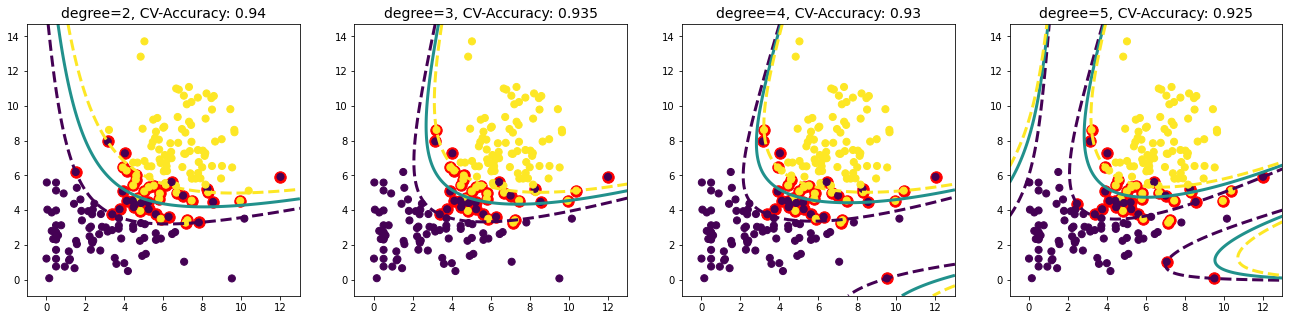

In [10]:
plt.figure(figsize=(22.5,5))
i = 1
for deg in [2, 3, 4, 5]:
    plt.subplot(1, 4, i)
    draw_svm(X,y,SVC(kernel='poly', degree=deg), 'degree='+str(deg))
    i += 1
plt.show()

#### Both

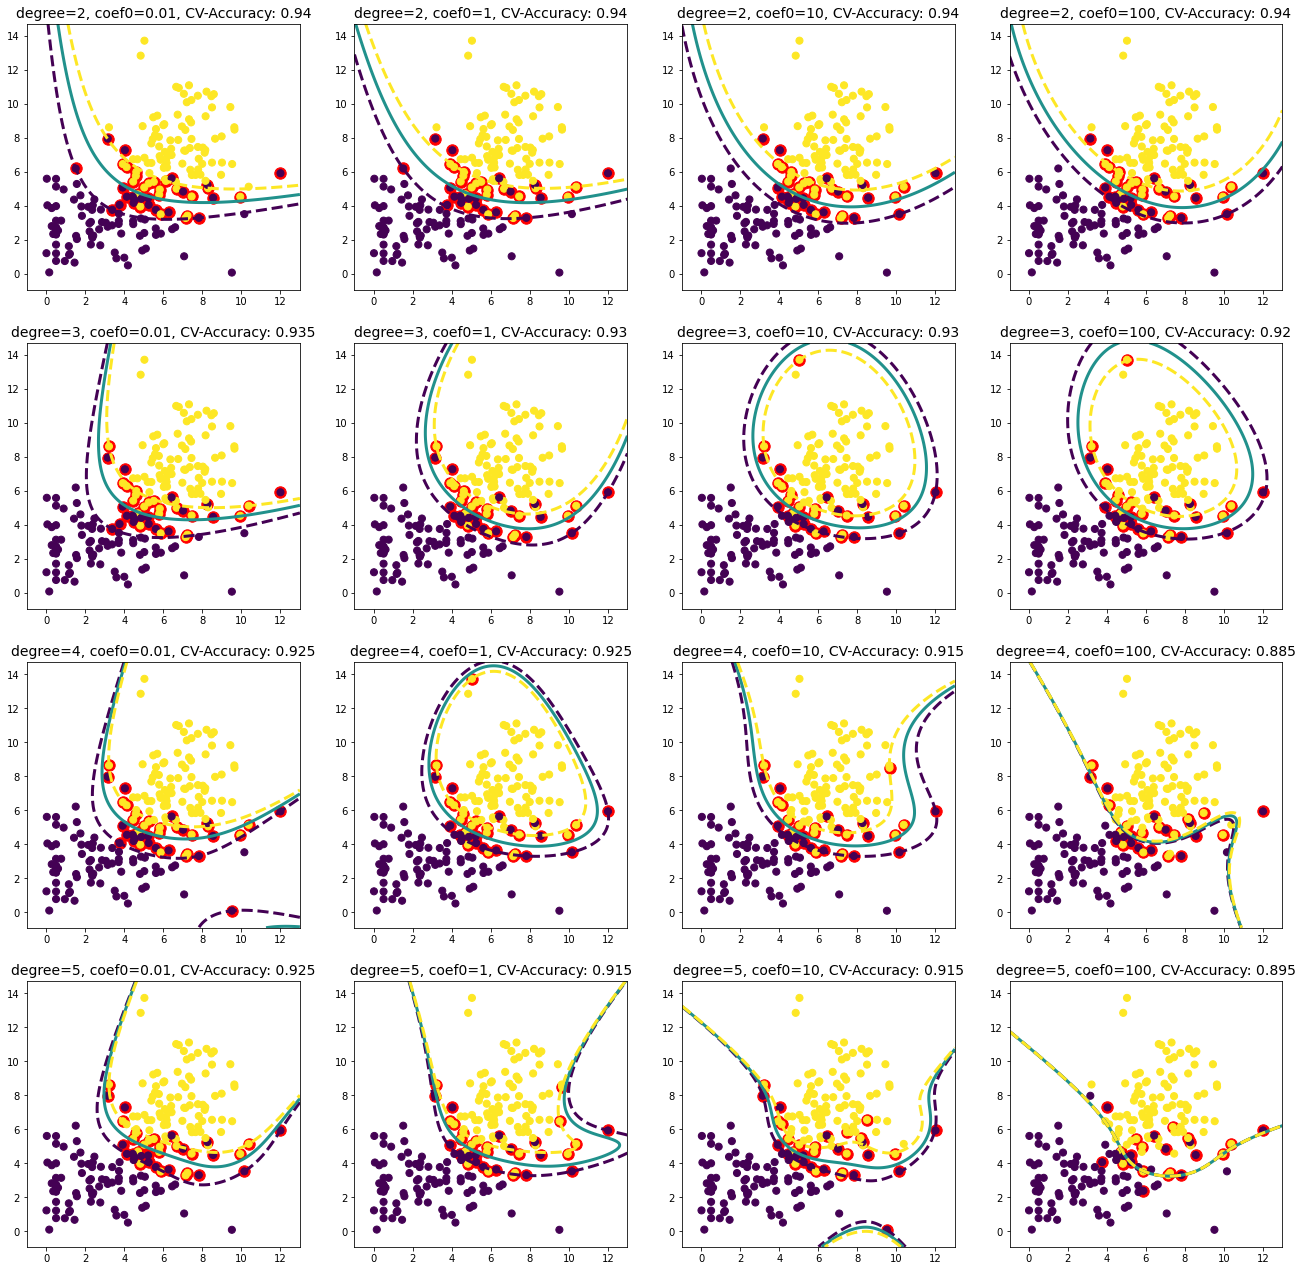

In [11]:
plt.figure(figsize=(22.5,22.5))
i = 1
for deg in [2, 3, 4, 5]:
    for coef0 in [0.01, 1, 10, 100]:
        plt.subplot(4, 4, i)
        draw_svm(X,y,SVC(kernel='poly', degree=deg, coef0=coef0), 'degree='+str(deg)+', coef0='+str(coef0))
        i += 1
plt.show()

### RBF kernel

$K(x_1, x_2) = \exp(\gamma\left\Vert x_1 - x_2\right\Vert^2)$
- $\gamma$: `gamma`

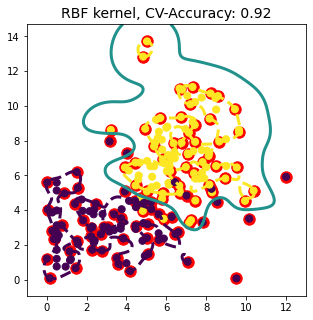

In [12]:
plt.figure(figsize=(5,5))
draw_svm(X,y,SVC(kernel='rbf', gamma=1),'RBF kernel')
plt.show()

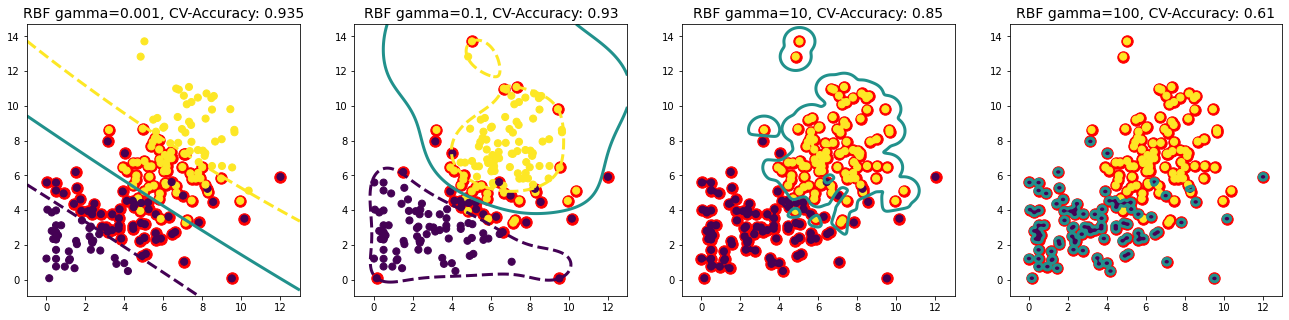

In [13]:
plt.figure(figsize=(22.5,5))
i = 1
for gamma in [0.001, 0.1, 10, 100]:
    plt.subplot(1, 4, i)
    draw_svm(X,y,SVC(kernel='rbf', gamma=gamma),'RBF gamma='+str(gamma))
    i += 1
plt.show()

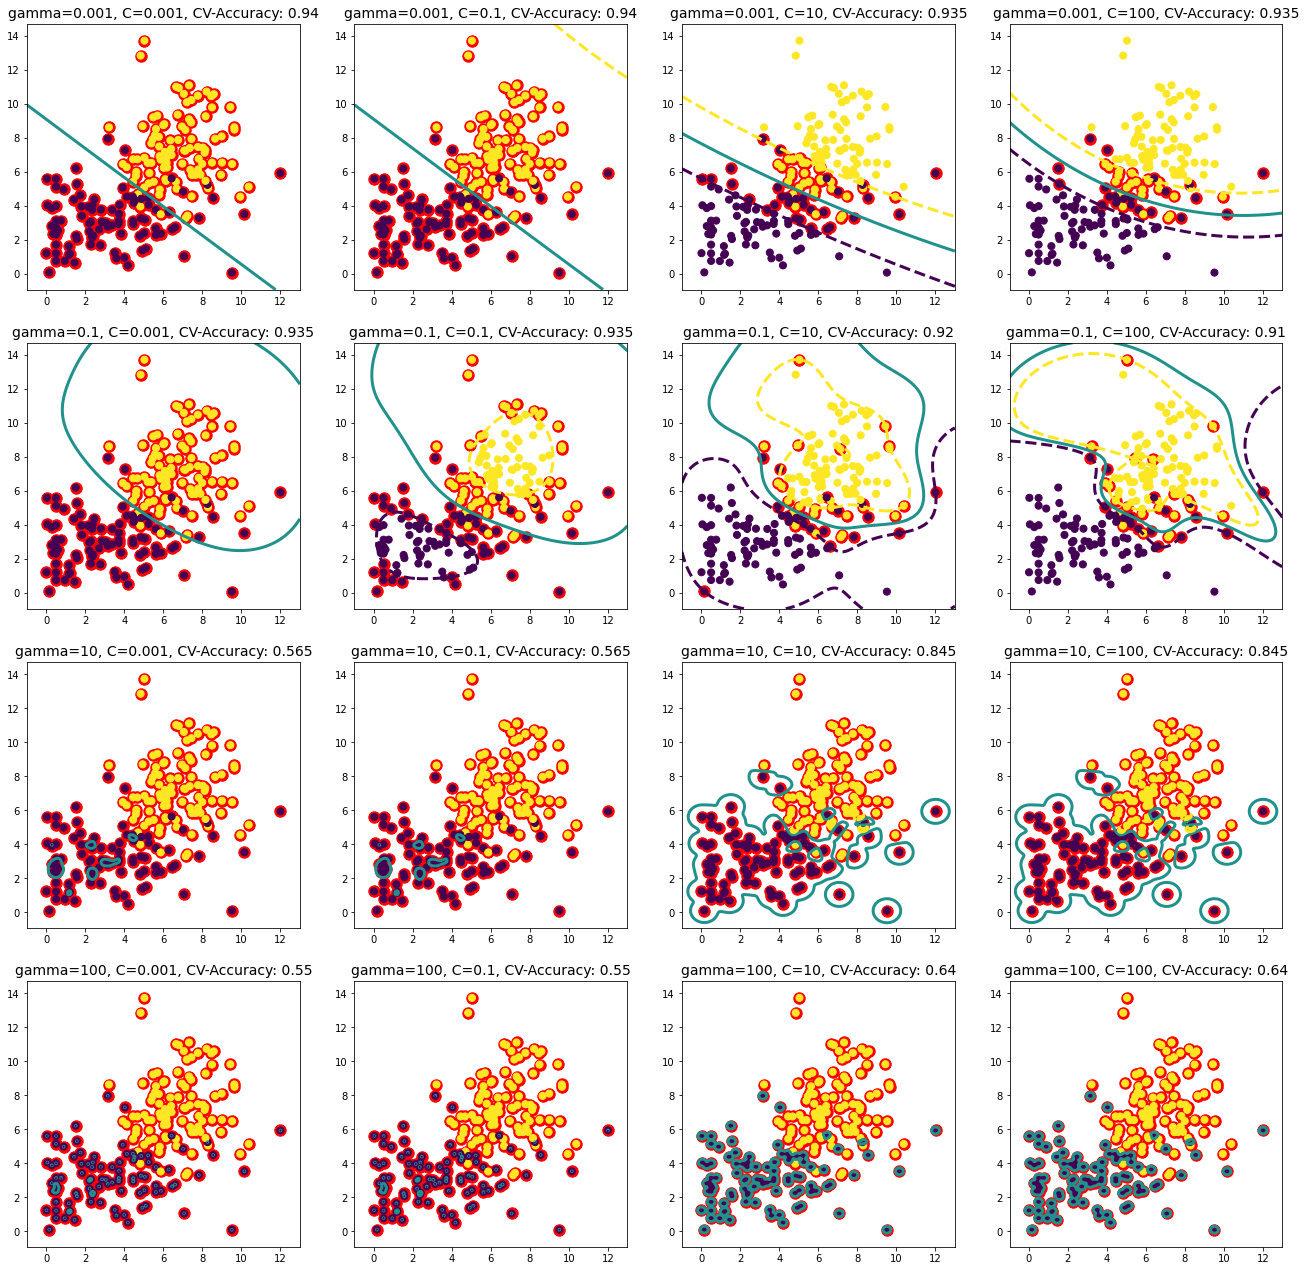

In [14]:
plt.figure(figsize=(22.5,22.5))
i = 1
for gamma in [0.001, 0.1, 10, 100]:
    for C in [0.001, 0.1, 10, 100]:
        plt.subplot(4, 4, i)
        draw_svm(X,y,SVC(kernel='rbf', gamma=gamma, C=C),'gamma='+str(gamma)+', C='+str(C))
        i += 1
plt.show()

### Sigmoid kernel

$K(x_1, x_2) = tanh(\gamma x_1\cdot x_2 + r)$
- $\gamma$: `gamma`
- $r$: `coef0`

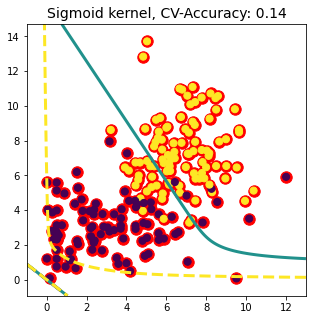

In [15]:
plt.figure(figsize=(5,5))
draw_svm(X,y,SVC(kernel='sigmoid', gamma=1),'Sigmoid kernel')
plt.show()

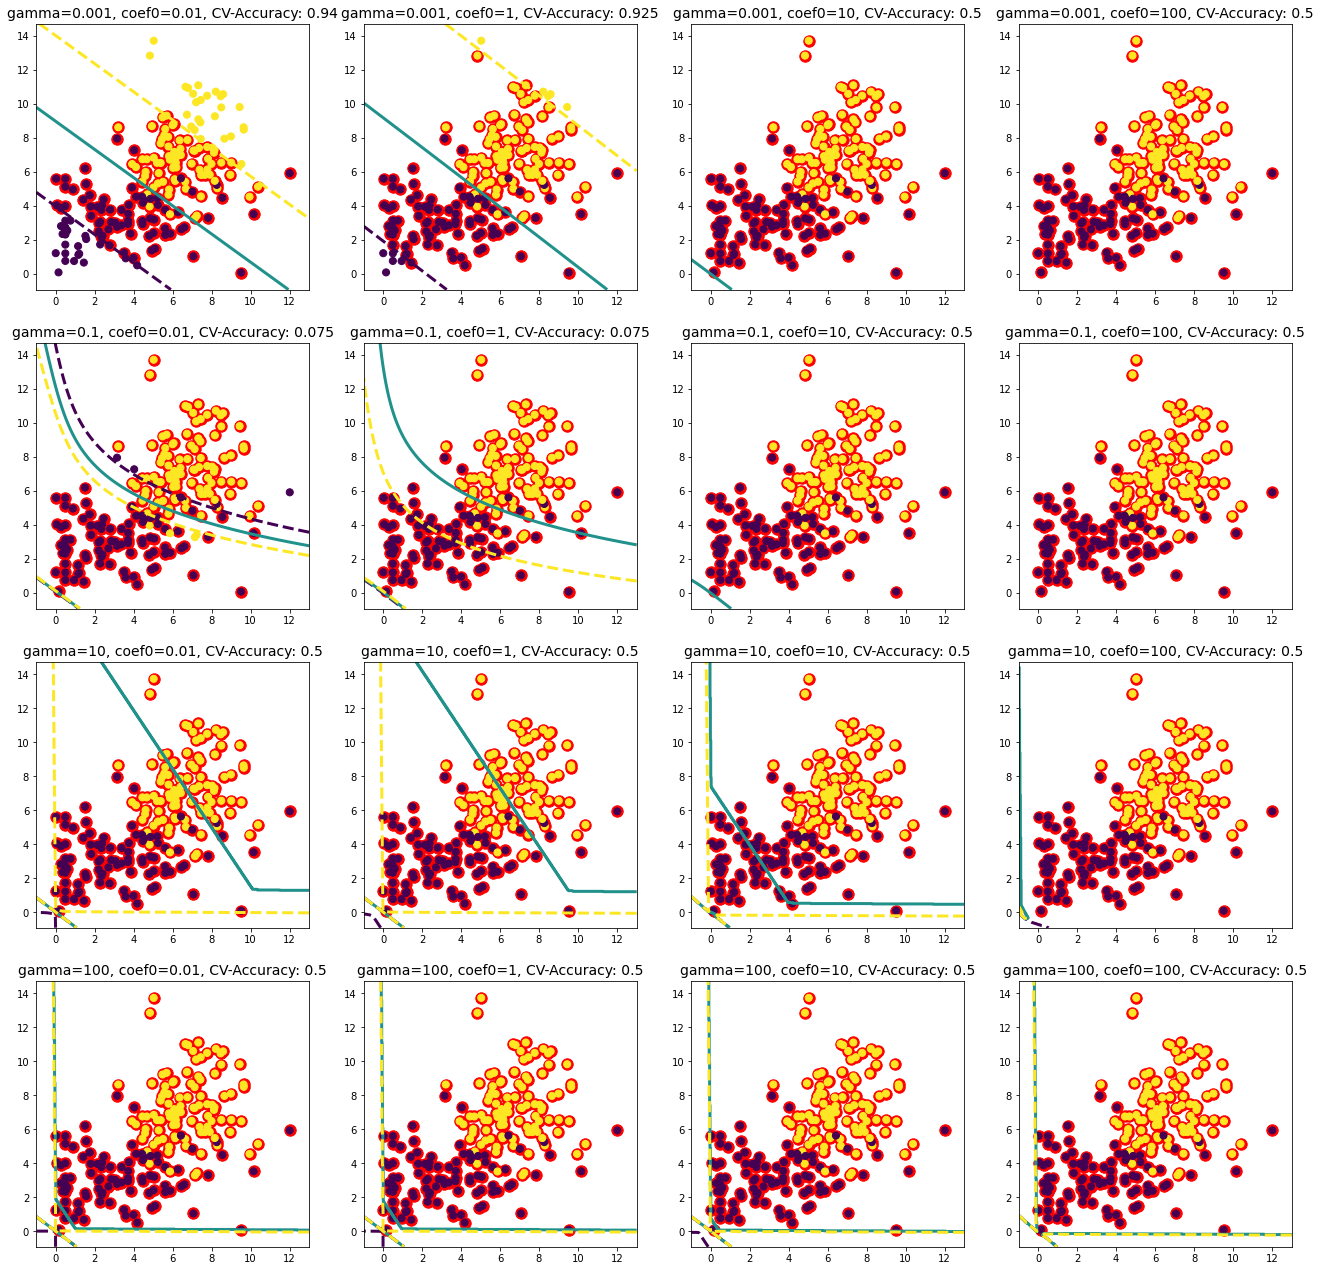

In [16]:
plt.figure(figsize=(22.5,22.5))
i = 1
for gamma in [0.001, 0.1, 10, 100]:
    for coef0 in [0.01, 1, 10, 100]:
        plt.subplot(4, 4, i)
        draw_svm(X,y,SVC(kernel='sigmoid', gamma=gamma, coef0=coef0), 'gamma='+str(gamma)+', coef0='+str(coef0))
        i += 1
plt.show()

## Tuning SVM

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : [2, 3],
    'coef0' : [0, 1],
    'gamma' : [0.001, 0.01, 0.1, 1],
    'C' : [0.001, 0.01, 0.1, 1]
}

gridsearch = GridSearchCV(SVC(),param_grid,scoring='accuracy')
gridsearch.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'coef0': [0, 1],
                         'degree': [2, 3], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [18]:
gridsearch.best_params_

{'C': 0.001, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}

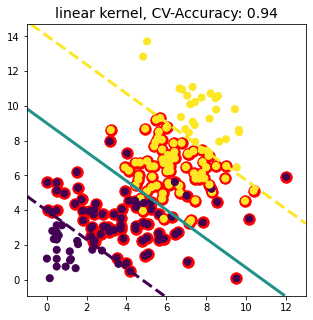

In [19]:
plt.figure(figsize=(5,5))
draw_svm(X,y,gridsearch.best_estimator_,'linear kernel')
plt.show()